# Modeling

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
import statsmodels.api as sm 
X= sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [44]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(cv_scores)
print ("Average 5-Fold CV score: {}".format(np.mean(cv_scores)))

[0.36768977 0.36273006 0.3605384  0.36288909 0.37424672]
Average 5-Fold CV score: 0.3656188090738046


## Model 2: Using SM OLS - Unscaled

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
X = sm.add_constant(X)

model2 = sm.OLS(y_train,X_train)
model2_results = model2.fit()
model2_results.summary()
#cv_scores = cross_val_score(model2,X_train,y_train, cv=5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     money_generated_log   R-squared:                       0.380
Model:                             OLS   Adj. R-squared:                  0.374
Method:                  Least Squares   F-statistic:                     68.17
Date:                 Wed, 07 Apr 2021   Prob (F-statistic):               0.00
Time:                         22:14:07   Log-Likelihood:                -5671.4
No. Observations:                 5959   AIC:                         1.145e+04
Df Residuals:                     5905   BIC:                         1.181e+04
Df Model:                           53                                         
Covariance Type:             nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.7823      0.156     -5.016      0.000      -1.088      -0.477
hospital_system_membership       0.1081      0.021      5.187      0.000       0.067       0.149
total_claim_count_log            0.0310      0.030      1.027      0.305      -0.028       0.090
total_drug_cost_log              0.0464      0.024      1.910      0.056      -0.001       0.094
sub_specialty_count              0.0735      0.011      6.877      0.000       0.053       0.094
DM_ACC                          -0.1560      0.102     -1.528      0.127      -0.356       0.044
DM_ACEP                         -0.1315      0.092     -1.427      0.154      -0.312       0.049
DM_ACOG                         -0.3251      0.129     -2.514      0.012      -0.579      -0.072
DM_ACPE                         -0.3449      0.164     -2.106      0.035      -0.666      -0.024
DM_ADA                          -0.9424      0.135     -6.991      0.000      -1.207      -0.678
DM_AGA                          -0.1603      0.128     -1.252      0.211      -0.411       0.091
DM_AMA                          -1.1423      0.075    -15.177      0.000      -1.290      -0.995
DM_AMAWEEKEND                   -1.0422      0.099    -10.574      0.000      -1.235      -0.849
DM_AOA                          -0.9336      0.109     -8.596      0.000      -1.147      -0.721
DM_APA                          -0.0537      0.093     -0.574      0.566      -0.237       0.129
DM_ASCO                          0.0416      0.111      0.376      0.707      -0.176       0.259
DM_ASHP                         -0.2980      0.144     -2.069      0.039      -0.580      -0.016
DM_ASN                          -0.3576      0.124     -2.875      0.004      -0.601      -0.114
DM_ATS                          -0.3841      0.128     -3.000      0.003      -0.635      -0.133
DM_AUA                           0.0242      0.124      0.196      0.845      -0.218       0.267
DM_CCF                          -0.2022      0.096     -2.098      0.036      -0.391      -0.013
DM_ENDO                         -0.3503      0.151     -2.321      0.020      -0.646      -0.054
DM_OtherPub                     -0.3422      0.113     -3.024      0.003      -0.564      -0.120
DM_SEMPA                        -0.3450      0.154     -2.236      0.025      -0.647      -0.043
DM_TMA                          -0.4433      0.170     -2.612      0.009      -0.776      -0.111
DM_Anesthesiology                0.1243      0.150      0.831      0.406      -0.169       0.417
DM_Cardiology                    0.0788      0.135      0.583      0.560      -0.186       0.344
DM_Dentist                      -0.0728      0.166     -0.437      0.662      -0.399       0.253
DM_Dermatology                  -0.1620      0.138     -1.172    

The Model 2 expained approximately the same amount of variance as Model 1, 37.4%

## Model 3: OLS Regression - Scaled

In [75]:
scaler = StandardScaler()

dummy_scaled = dummy.copy()
dummy_scaled = dummy_scaled [['money_generated_log','hospital_system_membership',
 'total_claim_count_log',
 'total_drug_cost_log',
 'sub_specialty_count',
 'DM_ACC',
 'DM_ACEP',
 'DM_ACOG',
 'DM_ACPE',
 'DM_ADA',
 'DM_AGA',
 'DM_AMA',
 'DM_AMAWEEKEND',
 'DM_AOA',
 'DM_APA',
 'DM_ASCO',
 'DM_ASHP',
 'DM_ASN',
 'DM_ATS',
 'DM_AUA',
 'DM_CCF',
 'DM_ENDO',
 'DM_OtherPub',
 'DM_SEMPA',
 'DM_TMA',
 'DM_Anesthesiology',
 'DM_Cardiology',
 'DM_Dentist',
 'DM_Dermatology',
 'DM_Emergency Medicine',
 'DM_Endocrinology',
 'DM_Family Medicine',
 'DM_Gastroenterology',
 'DM_General Practice',
 'DM_Hematology and Oncology',
 'DM_Hospitalist',
 'DM_Infectious Disease',
 'DM_Internal Medicine',
 'DM_Nephrology',
 'DM_Nurse/PA/Technician',
 'DM_Obstetrics and Gynecology',
 'DM_Ophthalmology',
 'DM_Other',
 'DM_Otolaryngology',
 'DM_Pediatrics',
 'DM_Pharmacist',
 'DM_Physical Therapist',
 'DM_Psychiatry and Neurology',
 'DM_Pulmonolgy',
 'DM_Radiology',
 'DM_Rheumatology',
 'DM_Student',
 'DM_Surgery',
 'DM_Urology']]

dummy_scaled =pd.DataFrame(scaler.fit_transform(dummy_scaled), columns=dummy_scaled.columns)


In [76]:
y_scaled = dummy_scaled['money_generated_log']
X_scaled = dummy_scaled[['hospital_system_membership',
 'total_claim_count_log',
 'total_drug_cost_log',
 'sub_specialty_count',
 'DM_ACC',
 'DM_ACEP',
 'DM_ACOG',
 'DM_ACPE',
 'DM_ADA',
 'DM_AGA',
 'DM_AMA',
 'DM_AMAWEEKEND',
 'DM_AOA',
 'DM_APA',
 'DM_ASCO',
 'DM_ASHP',
 'DM_ASN',
 'DM_ATS',
 'DM_AUA',
 'DM_CCF',
 'DM_ENDO',
 'DM_OtherPub',
 'DM_SEMPA',
 'DM_TMA',
 'DM_Anesthesiology',
 'DM_Cardiology',
 'DM_Dentist',
 'DM_Dermatology',
 'DM_Emergency Medicine',
 'DM_Endocrinology',
 'DM_Family Medicine',
 'DM_Gastroenterology',
 'DM_General Practice',
 'DM_Hematology and Oncology',
 'DM_Hospitalist',
 'DM_Infectious Disease',
 'DM_Internal Medicine',
 'DM_Nephrology',
 'DM_Nurse/PA/Technician',
 'DM_Obstetrics and Gynecology',
 'DM_Ophthalmology',
 'DM_Other',
 'DM_Otolaryngology',
 'DM_Pediatrics',
 'DM_Pharmacist',
 'DM_Physical Therapist',
 'DM_Psychiatry and Neurology',
 'DM_Pulmonolgy',
 'DM_Radiology',
 'DM_Rheumatology',
 'DM_Student',
 'DM_Surgery',
 'DM_Urology']]

In [78]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size = 0.25, random_state = 123)
X_scaled = sm.add_constant(X_scaled)

model3 = sm.OLS(y_train_scaled,X_train_scaled)
model3_results = model3.fit()
print(model3_results.summary())

                             OLS Regression Results                            
Dep. Variable:     money_generated_log   R-squared:                       0.380
Model:                             OLS   Adj. R-squared:                  0.374
Method:                  Least Squares   F-statistic:                     68.17
Date:                 Wed, 07 Apr 2021   Prob (F-statistic):               0.00
Time:                         23:39:39   Log-Likelihood:                -7045.3
No. Observations:                 5959   AIC:                         1.420e+04
Df Residuals:                     5905   BIC:                         1.456e+04
Df Model:                           53                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

The third model did not improve fit, yet the b-coefficients of the features are now directly comparable

## Model 4. Adding Interaction Terms

Among the variables whose impact on revenue is statistically significant, I selected the ones with the largest beta-coefficients to see if they interact with each other. These include membership in AMA and being an infectious disease doctor. Let's add those variables to the model

In [79]:
dummy_scaled['interact_AMA_Inf_disease'] = dummy_scaled['DM_AMA'] * dummy_scaled['DM_Infectious Disease']

In [80]:
y_scaled2 = dummy_scaled['money_generated_log']
X_scaled2 = dummy_scaled[['interact_AMA_Inf_disease','hospital_system_membership',
 'total_claim_count_log',
 'total_drug_cost_log',
 'sub_specialty_count',
 'DM_ACC',
 'DM_ACEP',
 'DM_ACOG',
 'DM_ACPE',
 'DM_ADA',
 'DM_AGA',
 'DM_AMA',
 'DM_AMAWEEKEND',
 'DM_AOA',
 'DM_APA',
 'DM_ASCO',
 'DM_ASHP',
 'DM_ASN',
 'DM_ATS',
 'DM_AUA',
 'DM_CCF',
 'DM_ENDO',
 'DM_OtherPub',
 'DM_SEMPA',
 'DM_TMA',
 'DM_Anesthesiology',
 'DM_Cardiology',
 'DM_Dentist',
 'DM_Dermatology',
 'DM_Emergency Medicine',
 'DM_Endocrinology',
 'DM_Family Medicine',
 'DM_Gastroenterology',
 'DM_General Practice',
 'DM_Hematology and Oncology',
 'DM_Hospitalist',
 'DM_Infectious Disease',
 'DM_Internal Medicine',
 'DM_Nephrology',
 'DM_Nurse/PA/Technician',
 'DM_Obstetrics and Gynecology',
 'DM_Ophthalmology',
 'DM_Other',
 'DM_Otolaryngology',
 'DM_Pediatrics',
 'DM_Pharmacist',
 'DM_Physical Therapist',
 'DM_Psychiatry and Neurology',
 'DM_Pulmonolgy',
 'DM_Radiology',
 'DM_Rheumatology',
 'DM_Student',
 'DM_Surgery',
 'DM_Urology']]

In [81]:
X_train_scaled2, X_test_scaled2, y_train_scaled2, y_test_scaled2 = train_test_split(X_scaled2, y_scaled2, test_size = 0.25, random_state = 123)
X_scaled2 = sm.add_constant(X_scaled2)

model4 = sm.OLS(y_train_scaled,X_train_scaled)
model4_results = model4.fit()
print(model4_results.summary())

                             OLS Regression Results                            
Dep. Variable:     money_generated_log   R-squared:                       0.380
Model:                             OLS   Adj. R-squared:                  0.374
Method:                  Least Squares   F-statistic:                     68.17
Date:                 Wed, 07 Apr 2021   Prob (F-statistic):               0.00
Time:                         23:40:19   Log-Likelihood:                -7045.3
No. Observations:                 5959   AIC:                         1.420e+04
Df Residuals:                     5905   BIC:                         1.456e+04
Df Model:                           53                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

The interaction term did not boost the model and was not statistically significant, so let's get rid of it and go with model 3

In [83]:
y_pred = model3_results.predict(X_test_scaled)

Text(0, 0.5, 'Predicted')

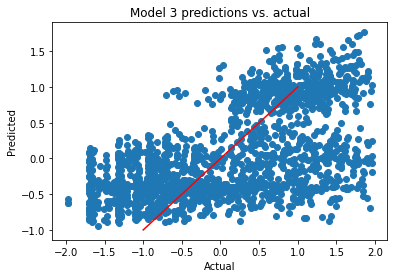

In [89]:
plt.scatter(y_test_scaled, y_pred)
plt.plot([x for x in range(-1,2)],[x for x in range(-1,2)], color='red')

# Label it nicely
plt.title("Model 3 predictions vs. actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Recipient Features Predicting Revenue

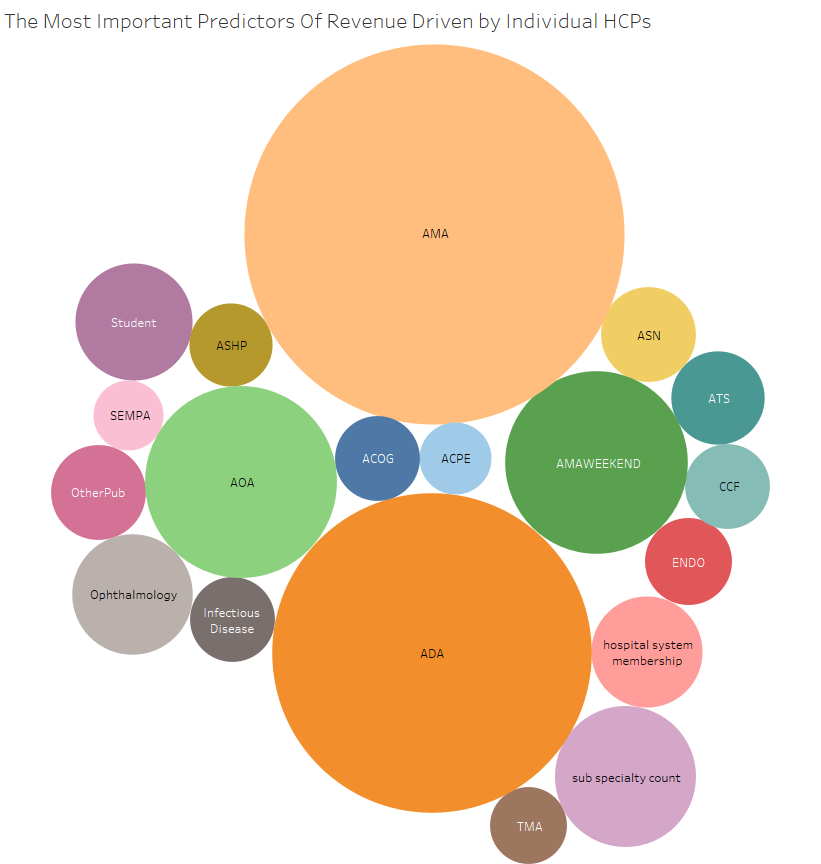

As we can see, membership in associations including AMA, ADA, AOA, and AMAWeekend are the most important factors impacting the revenue driven by individual HCPs. This is not surprising given the ads are being priced differently, depending on the size of an association and its medican specialization.

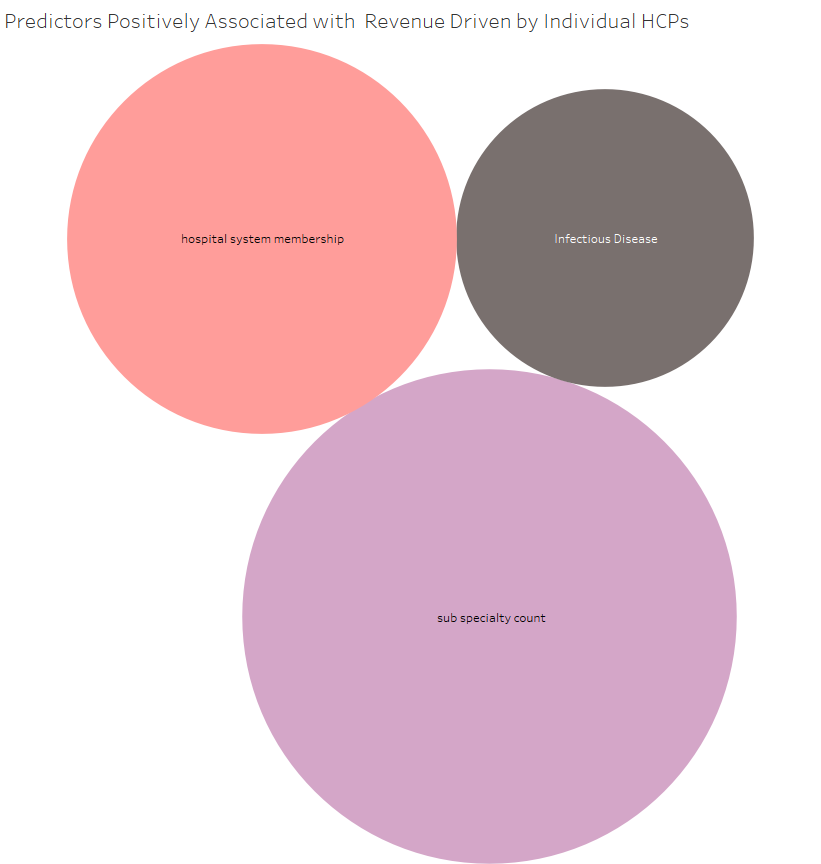

Among the features that are positively associated with revenue, the number of subspecialties a recipient has plays the most important role. This gives an advantage to doctors with narrow specializations because their broader specialties are also included into the count, in addition to subspecialties. In addition, doctors from large hospital systems tend to drive more revenue, compared to local hospitals. Finally doctors specializing in Infectious Disease also drove more revenue than doctors with other specializations. However, this migh be the effect of 2020 and COVID-19. 

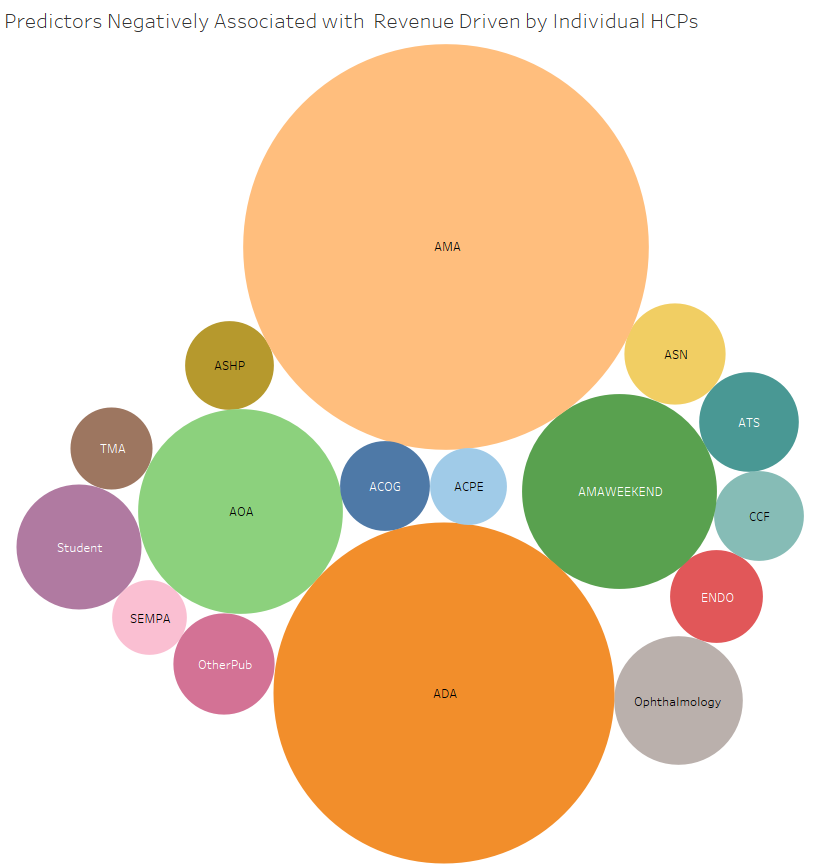

Lastly, the most important negative predictors of revenue were membership in the American Medical Association (AMA) whose briefings are priced lower than more specialized publications, as well as memberships in AOA (American Optometric Association) and ADA (American Dental Association), perhaps due to the smaller amount of advertisers or products worth advertising to these audience (e.g. medications). 